# Scientific Python Summary

### Contents <a id='contents'></a>
* [Online references](#onlinerefs)
* [Boilerplate](#boilerplate)
* [Basic syntax](#basicsyntax)
* [Functions](#functions)
* [Conditionals](#conditionals)
* [Loops](#loops)
* [Arrays](#arrays)
* [Plotting](#plotting)
* [File I/O](#fileio)
* [Formatting numbers, precision, output](#formatting)
* [Classes](#classes)
* [Nonlinear equations](#nonlinearequations)
* [Integration](#integration)
* [Interpolation](#interpolation)
* [Curve fitting](#curvefitting)
* [ODEs](#odes)
* [Symbolic math](#symbolicmath)
* [Formatting notebook cells (Markdown and LaTeX)](#formatting)

### Online references  <a id='onlinerefs'></a>

* [BYU ChEn 263 class](http://ignite.byu.edu/che263)
* Here is another, more **[in-depth website](http://nbviewer.org/github/jrjohansson/scientific-python-lectures/tree/master/)**
* For **Numpy**, see these links:
    * Numpy for Matlab users: [https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html)
        * This too: [http://mathesaurus.sourceforge.net/matlab-numpy.html](http://mathesaurus.sourceforge.net/matlab-numpy.html)
    * Quickstart numpy tutorial: [https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html](https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html)
    * Linear algebra: http://docs.scipy.org/doc/numpy/reference/routines.linalg.html
    * Cookbook with good recipes: https://scipy-cookbook.readthedocs.io/
* For **Scipy** see these links (for interpolation, solving, etc.)
    * See http://www.scipy.org/docs.html  
* For **sympy** see [this link](http://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb) for good examples.


### Boilerplate <a id='boilerplate'></a>

In [2]:
# %load http://che.byu.edu/imports.py
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize      import fsolve, curve_fit
from scipy.integrate     import odeint, quad
from scipy.interpolate   import interp1d
from scipy.misc          import derivative
import scipy.constants   as const
import sympy             as sp
sp.init_printing()
from IPython.display     import display
import glob
import time
#import pint; u = pint.UnitRegistry()


## Basic syntax <a id='basicsyntax'></a>
[Contents](#contents)

* Don't need to declare variables
    * Just type: var = 5
* Indentation matters.  Indentation is how blocks are separated, like contents of an if statement, or a function, etc.
* Functions, if statements, for loops all end in a ":"
* Comments start with a #
* The usual math: +, -, *, /
    * \*\* for a power, like x**0.5 for a square root
    * % is the modulus
* Print to the screen with "print()"
    * print('some text')
    * print(some_variable)
    * print(some_function_call(x))
    * print('my_var = ', my_var, ' and some_function(x) = ', some_function(x))
        * that is, separate output with commas
* IF YOU ARE USING PYTHON 2, BE REALLY CAREFUL WITH INTEGERS.  2/3 is not 0.666666, its zero.  Get in the habit of typing 2./3.
    * Or, do ```from __future__ import division```
* ALSO, BE REALLY CAREFUL WITH ARRAY ASSIGNMENT: x=y --> x and y are aliases for the same object. Instead do x = y.copy()
* \ is an escape character, and can also be used for multi-line statements.


### Functions <a id='functions'></a>
[Contents](#contents)

$f(x) = x^2$
```python
def f(x) :
    return x**2.0
```

$f(x,y) = x^2 + y^2$

```python
def f(x,y=5) :                       # y has a default argument
    return x**2.0 + y**2.0
```
If you call this as f(my_x), then it will assume y=5 in the function. If you call it with f(my_x, my_y), then it will use x=my_x and y=my_y in the function. 

### Conditionals  <a id='conditionals'></a>
[Contents](#contents)
* Keywords:
    * if
    * elif
    * else
```python
if x < 3 and x != 1 :
        # do stuff
elif x < 4 or x > 8 :
        # do stuff
else :
        # do stuff
```
        
* Conditionals: 
```python  
    ==, !=, <, <=, >, >=, and, or, not
```
* One-line if:
```python
value_when_true if condition else value_when_false
```
```python
I_am = "happy" if myeditor=="vim" else "annoyed"
```

### Loops   <a id='loops'></a>
[Contents](#contents)
* Keywords
    * for
    * range
    * break
    * continue
    * while

In [4]:
for i in range(3) :             # range will start at 0, and do all but the last
    print(i)

0
1
2


In [5]:
for i in range(3,6) :
    print(i)

3
4
5


In [6]:
for i in range(5,2,-1) :
    print(i)

5
4
3


In [7]:
for i in range(100) :
    if i < 3  : continue
    print(i)
    if i == 5 : break            # note, you can put this on one line

3
4
5


### Arrays    <a id='arrays'></a>
[Contents](#contents)

Use Numpy for all computational arrays.


In [8]:
x  = np.array([1.1, 2.2, 3.3])  # 1-D array
xx = np.array([[11, 12, 13],[21,22,23],[31,32,33]])

print("x=\n", x, '\n')
print("xx=\n", xx, '\n')

x[0] = 1.5       # indexing starts at 0
xx[1,2] = 18     # xx[row,column]
c0 = xx[:,0]     # 0th column
c1 = xx[:,1]     # 1st column
x[1:]            # elements 1 to the end
x[:2]            # elements 0, 1 (2 skipped)
x[-1]            # last element
x[-2]            # next to last element  (note, this line gets output)

x=
 [ 1.1  2.2  3.3] 

xx=
 [[11 12 13]
 [21 22 23]
 [31 32 33]] 



#### Array functions
```python
x = np.linspace(1.1, 5.5, 50)     # (start, stop, n_points), stop is included
x = np.logspace(0,3,10)           # 10^0 to 10^3 with 10 points 
np.shape(x)                       # rows, columns returned
np.size(xx,1)                     # num elems on axis 1, or total numb: np.size(xx)
np.dot(x,y)                       # dot product
x=np.linalg.solve(A,b)            # solve linear system: Ax=b
y=x.copy()                        # make a SEPARATE copy of y, unlike x=y
xx.T
xx.transpose()                    
np.sort(x)                        
np.diag(xx)                       # or np.diag(xx,1), np.diag(xx,-1), etc. for off-diags
np.vstack([x,x]).T                # takes x's (rows) stack 'em vert, then .T to cols
np.hstack                         # stack horizontally (less useful for 1-D arrays
np. sin, cos, exp, sqrt(), etc. 
np.pi                             
```

### Plotting   <a id='plotting'></a>
[Contents](#contents)

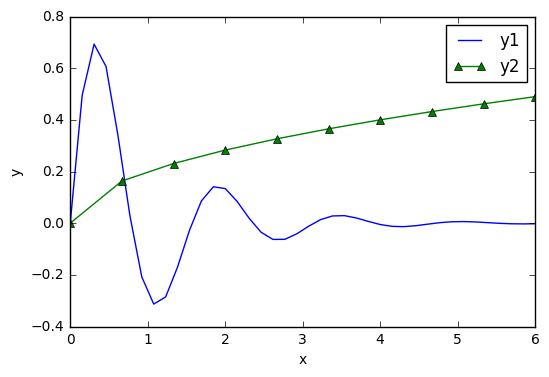

In [9]:
x1 = np.linspace(0,6,40)
y1 = np.exp(-x1)*np.sin(4*x1)
x2 = np.linspace(0,6,10)
y2 = 0.2*np.sqrt(x2)


plt.plot(x1,y1,'-'  ,label='y1')   # linestyles: --   -.   :  etc; colors = kbrgcm; k=black
plt.plot(x2,y2,'g^-',label='y2')   # g^- is color,symbol,line: symbols: .s^v*dpx+<>h
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


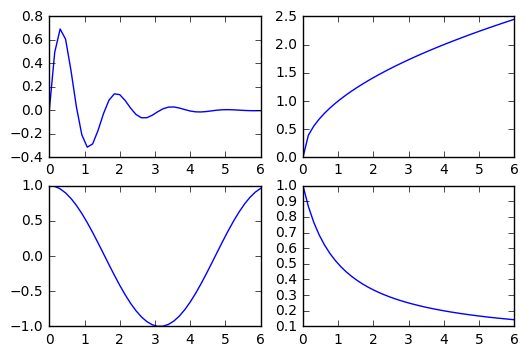

In [10]:
x = x1.copy()
plt.subplot(2,2,1)         # (2,2,1) = 2x2 matrix of plots, and activate plot 1 (L-R, T-B)
plt.plot(x,y1)

plt.subplot(2,2,2)
plt.plot(x,np.sqrt(x))

plt.subplot(2,2,3)
plt.plot(x,np.cos(x))

plt.subplot(2,2,4)
plt.plot(x,1/(x+1))

### File I/O <a id='fileio'></a>
[Contents](#contents)

* Numpy
* Yaml
* General

#### Numpy

```python
np.savetxt("fileName", matrix)     # optional args: header, comments, format, etc.
data = np.loadtxt(fileName)        # optional args...
```

#### Yaml
```python
ifile = open("fileName.yaml", 'r')
yfile = yaml.load(ifile)
ifile.close()

someVar = yfile["someVar"]        # yaml line looks like:  someVar: 8314.46   # J/kmol*K
# OR
subVar = yfile["someVar"]["subVar] 
```

#### General: Input
```python
ifile = open("fileName", 'r')

single_line = ifile.readline()
list_of_all_lines = ifile.readlines()
for line in list_of_all_lines :
    # process line:
    words = line.split()

ifile.close()
```
#### General: Output
```python
ofile = open("fileName", 'w')

ofile.write("# x, y")
for i in range(np.size(x)) :
    ofile.write(x[i], y[i])
    # or better yet: 
    # ofile.write("%12.5e  %12.5e" %(x[i], y[i]))

ofile.close()
```

### Formatting numbers, precision, output <a id='formatting'></a>
[Contents](#contents)

#### Define some constants

In [3]:
pi = 3.14159265358979323846264338 
Na = 6.0221409e+26                 # #/kmol
atm = 101.325                      # kPa
kB  = 1.3806485279E-23             # J/K
Rg  = 8314                         # J/kmol*K

#### Format 'em
* Use a formatted string
    * ```f"some text, value of var inserted here: {var}"```
    * That is, ```{var}``` inserts the value of variable var
    * Can have multiple ```{var}``` in a single string.
* Format the variable like this ```{var:w.pt}```
    * The format is after the ```:```
    * ```w``` is the width the variable should take (optional)
    * ```.p``` is the precision (optional)
    * ```t``` is the type (optional)
        * ```e``` for scientific 6.02E23
        * ```f``` for floating point number 3.14
        * ```d``` for integer 101
        * ```s``` for string
        * etc.

In [4]:
print(    f"Na  = {Na:20.7e} #/kmol" )
print(    f"atm = {atm:20.3f} kPa"   )
print(    f"Rg  = {Rg:20d} J/kmol*K" )

Na  =        6.0221409e+26 #/kmol
atm =              101.325 kPa
Rg  =                 8314 J/kmol*K


### Classes <a id='classes'></a>
[Contents](#contents)

In [11]:
class units: 
    
    def __init__(self) :      # this gets called when we create an object of the class
        self.m_to_ft = 3.28084
        self.hr_to_s = 3600
        self.mi_to_ft = 5280
        self.K_to_R   = 9.0/5.0
    
    def F_to_C(self, Tf) :     # ignore the self argument when calling: my_units.F_to_C(T)
        Tc = (Tf-32) / self.K_to_R
        return Tc
    
#--------------------

my_units = units()
Tf = 212.0
Tc = my_units.F_to_C(Tf)
print("%g F = %g C" %(Tf, Tc))

212 F = 100 C


### Nonlinear equations <a id='nonlinearequations'></a>
[Contents](#contents)

x = fsolve(func, x_guess)
1. Write as $f(x)=0$.
1. Define the function
1. Set an inital guess
1. ```x = fsolve(func, x_guess)```

#### Multiple nonlinear equations:

$$g(y,z) = 0, $$
$$h(y,z)=0.$$

1. Write this as
$$\vec{f}(\vec{x}) = \vec{0},$$
where $f[0] = g$, $f[1] = h$; and $x[0] = y$, $x[1] = z$.
1. Define the function: it takes a vector of unknowns and returns a vector of functions to zero.
1. Set a vector (array) of initial guesses for the unknowns
1. ```x = fsolve(func, x_guess)```

### Integration  <a id='integration'></a>
[Contents](#contents)
```python
quad(func, a, b)
```
To solve $I = \int_a^bf(x)dx$:
1. Define the function
2. ```I = quad(f,a,b)```

### Interpolation   <a id='interpolation'></a>
[Contents](#contents)
```python
f_interp = interp1d(x_data, y_data)       # is linear interp; or add kind="cubic"
y_interp = f_interp(x_interp)
```

### Curve fitting    <a id='curvefitting'></a>
[Contents](#contents)
#### Polynomial fit

```python
p = np.polyfit(x_data, y_data, polynomialOrder)    # e.g. order = 2 for ax^2 + bx + c
y_eval = np.polyval(p, x_eval)
```

#### General fit
$f(x) = a\exp(-bx)+c.$
* We are given some data. Find $a$, $b$, $c$ that best fit the data for the given function.
1. Define the function as ```f(x,a,b,c)```
1. ```params, extras = cuve_fit(f, x_given, y_given)```
1. ```a=params[0]; b=params[1]; c=params[2]``` 

### ODEs   <a id='odes'></a>
[Contents](#contents)

Normally, we have a system of coupled ODEs, like:
\begin{align}
\frac{dT}{dt} &= g(T,Z,t)\\
\frac{dZ}{dt} &= h(T,Z,t).
\end{align}
Write this in vector form:
$$\frac{d\vec{y}}{dt} = \vec{f}(\vec{y},t),$$
where, $y[0] = T$, $y[1]=Z$; and $f[0] = g$, $f[1]=h$.
1. Define the function $\vec{f}(\vec{y},t).$
1. Set a vector of initial conditions for $\vec{y}_0 = (T_0,Z_0)^T.$
1. Set an array of times to solve for.
1. ```y = odeint(f, y0, times)```
1. ```T=y[:,0]; Z=y[:,1]```

### Symbolic math   <a id='symbolicmath'></a>
[Contents](#contents)

```python
x, y, z = sp.symbols('x, y, z')        # declare x, y, z to be symbols

my_ex = x*sp.cos(y)                    # store an expression as variable my_ex

my_ex.subs(x,z**2)                  # substituion: --> z**2*cos(y)

my_ex.evalf(subs={y:1,z:2})         # numeric evaluation

my_ex = x**2/x
sp.simplify(my_ex)                     # --> x

sp.expand((x+2)*(x-3))                 # --> x^2-x-y

sp.factor(x**3 - x**2 + x - 1)         # --> (x-1)(x^2+1)

etc.
```

#### Derivatives

```python
sp.diff(sp.cos(x),x)                  # --> -sin(x)
sp.diff(x**4,x,x,x)                   # d^3(x^4)/dx^3 --> 24x

my_exp = sp.exp(x*y*z)
my_der = sp.Derivative(my_exp,x,y,z)  # d^3(e^xyz)/dxdydz: makes the expr, not eval it
my_der.doit()                         # now eval it --> (x^2y^2z^2 + 3xyz +1)e^xyz

```

#### Integrals
```python
sp.integrate(x**2,x)                  # --> x^3/3

sp.integrate(sp.exp(-x), (x,0,oo))    # --> 1;   infinity is "oo" (double o's)

sp.integrate(sp.exp(-x**2-y**2), (x,-oo,oo), (y,-oo,oo))   # double integral --> pi

my_ex = sp.Integral(log(x)**2,x)      # makes the expr, doesn't eval it
my_ex.doit()                         # now eval it

```

#### Solvers
```python 
sp.solve(x**2-1, x)                   # --> [-1, 1]

my_ex = sp.Eq(x**2, 1)                # Eq(x**2,1) --> x**2 = 1; use for equality 
sp.solve(my_ex, x)                    # --> [-1, 1]

sp.solve([x-y+2, x+y-3], [x,y])       # --> x = 1/2, y = 5/2   (symbolic, not numeric)
```
#### Solve differential equations
```python
f, g = sp.symbols('f, g', cls=Function)    # define function symbols

f(x).diff(x)                               # --> df(x)/dx
```
Setup and solve this equation:
$$f^{\prime\prime}(x)-2f^{\prime}(x)+f(x) = sin(x).$$

```python
my_diffeq = sp.Eq( f(x).diff(x,x) - 2*f(x).diff(x) + f(x), sin(x) )
sp.dsolve(my_diffeq, f(x))                 # --> f(x) = (C_1 + C_2x)e^x + cos(x)/2
```

#### Matrices
* Lots of functions available: shape, row, cold, T, zeros, ones, rref, col_del, row_insert, etc.

```python
A = sp.Matrix([1,-1],[3,4],[0,2]])     # 3x2 matrix
b = sp.Matrix([1,2])                   # assumes a column vector

A.shape                             # --> (3,2)
A.row(1)                            # --> [3,4]
A.row_del(0)                        # --> deletez row [1, -1]

x = A**-1 * b                       # --> x = [-1,1]^T;   solve for x

# fill A, b with symbolic vars, then do:
A.inv()*b                           # --> symbolic x in terms of A, b elements
```














































































### Formatting notebook cells <a id='formatting'></a>
[Contents](#contents)
#### Markdown
(Its called markdown instead of markup because its easy!)

[Markdown basics](https://help.github.com/articles/markdown-basics/)

[Markdown wiki](https://en.wikipedia.org/wiki/Markdown)

* Headers
    * ```# This is a big header```
    * ```## Smaller header```
    * ```### Etc.```
    * # This is a big header
    * ## Smaller header
    * ### Etc.
* Bold
    * ```*This will be italic (there is no space after the star)*```
    * *This will be italic (there is no space after the star)*
* Italic
    * ```**This will be bold text (again no space)**```
    * **This will be bold text (again no space)**
* Bullet points:

```
* This is a bullet: type a star, then space, then type
    * This one will be indented 
    * So is this with a "*" style bullet
* Another bullet point
```

* Numbered lists: 

```
1. This is an item
2. This is an item 
  1. This is a sub item (will become "A")
  2. Another sub (will become "B")
3. Item
```

1. This is an item
2. This is an item 
  1. This is a sub item
  2. Another sub
3. Item


* Hyperlinks: ```[Link to Google](http://www.google.com)```
    * Hyperlinks: [Link to Google](http://www.google.com)
* Block quote, start line with ">", newline with ```<br>```, end with blank line.

This is a blockquote:
> This is a block quote <br>
And here is a new line

* Add "code" elements between triple back quotes:
```python
for i in range(25) :
    print(i)
```
* Horizontal line: "--------" or "________"
* You can add arbitrary HTML code
    * Font color ```<font color="red">This is red</font>```
        * Font color <font color="red">This is red</font>
    * Insert an image: ```<img src="pic.png">```<img src="pic.png" style ="height:300px"> (https://xkcd.com/353/)
* Tables:

```
| Code   | Meaning                                          | 
|-----------------------------------------------------------|
| %s     | string                                           |     
| %r     | string (converts any python object)              |          
| %c     | single character                                 |          
| %d     | signed integer                                   |          
| %f     | floating point decimal number                    |          
| %e, %E | exponential notation (lowercase)                 |          
| %g, %G | pretty output: like %e, %E, if exp > -4, else %f |
```

| Code   | Meaning                                          | 
|-----------------------------------------------------------|
| %s     | string                                           |     
| %r     | string (converts any python object)              |          
| %c     | single character                                 |          
| %d     | signed integer                                   |          
| %f     | floating point decimal number                    |          
| %e, %E | exponential notation (lowercase)                 |          
| %g, %G | pretty output: like %e, %E, if exp > -4, else %f |

#### Latex Equations
[Cheat Sheets](http://www.harding.edu/lmurray/latex_files/latexref/latexcheatsheet.pdf)

[Online Latex Editor](http://www.sciweavers.org/free-online-latex-equation-editor)

* **Equations** go between ```$'s.``` Like this: ```$f(x)=x^2+3$```. This gives $f(x)=x^2.$
* **Equation on its own line**, use ```$$f(x)=x^2+3.$$``` $$f(x)=x^2+3.$$
* **Latex basics** (leaving off the ```$'s``` below)
    * ```^``` for **superscript**: ```T^2``` $\rightarrow T^2$.
    * ```_``` for **subscript**: ```T_0``` $\rightarrow T_0$.
    * Use {\*} to enclose **multiple characters**: ```T_{min}``` $\rightarrow T_{min}$.
    * Note: ```sin(x)``` $\rightarrow sin(x)$, but $s$, $i$, $n$ are treated as separate variables. 
        * Instead, use "\sin", like this: ```\sin(x)``` $\rightarrow \sin(x)$.
        * ```\exp, \sin, \log```, etc.
    * ```\sqrt{5+x}``` $\rightarrow \sqrt{5+x}$.
    * ```\int_a^bf(x)dx``` $\rightarrow \int_a^bf(x)dx$.
    * ```\frac{a+b}{c^2}``` $\rightarrow \frac{a+b}{c^2}$.
    * **Greek**: spell it out:
        * ```\lambda, \xi, \pi, \Lambda, \Xi, \Pi``` $\rightarrow \lambda,\,\, \xi,\,\, \pi,\,\, \Lambda,\,\, \Xi,\,\, \Pi$.
    * ```\frac{\partial f}{\partial x}``` $\rightarrow \frac{\partial f}{\partial x}$.
    * For large (\*) or [\*] or {\*} use ```\left(``` and ```\right)``` or ```\left[``` and ```\right]```, etc. $$f(x) = \left[\frac{(a+b)}{\sqrt{b}}\right].$$
    * **Matrices**
    ```
$$\left[\begin{array}{ccc}
a & b & c \\
d & e & f \\
g & h & i \end{array}
\right]$$```
$$
\left[\begin{array}{ccc}
a & b & c \\
d & e & f \\
g & h & i \end{array}
\right]
$$
